# Telco Churn prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Telecom_Churn.csv')

y = df['Churn']

drop_cols = ['Churn', 
             'Area code', 
             'State']

X = df.drop(drop_cols, axis=1)

bin_cols = ['International plan', 'Voice mail plan']

X[bin_cols] = X[bin_cols].map(lambda x: 1 if x == 'Yes' else 0)

display(X.head())
len(X)
print(X.isna().sum())

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Account length            0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
dtype: int64


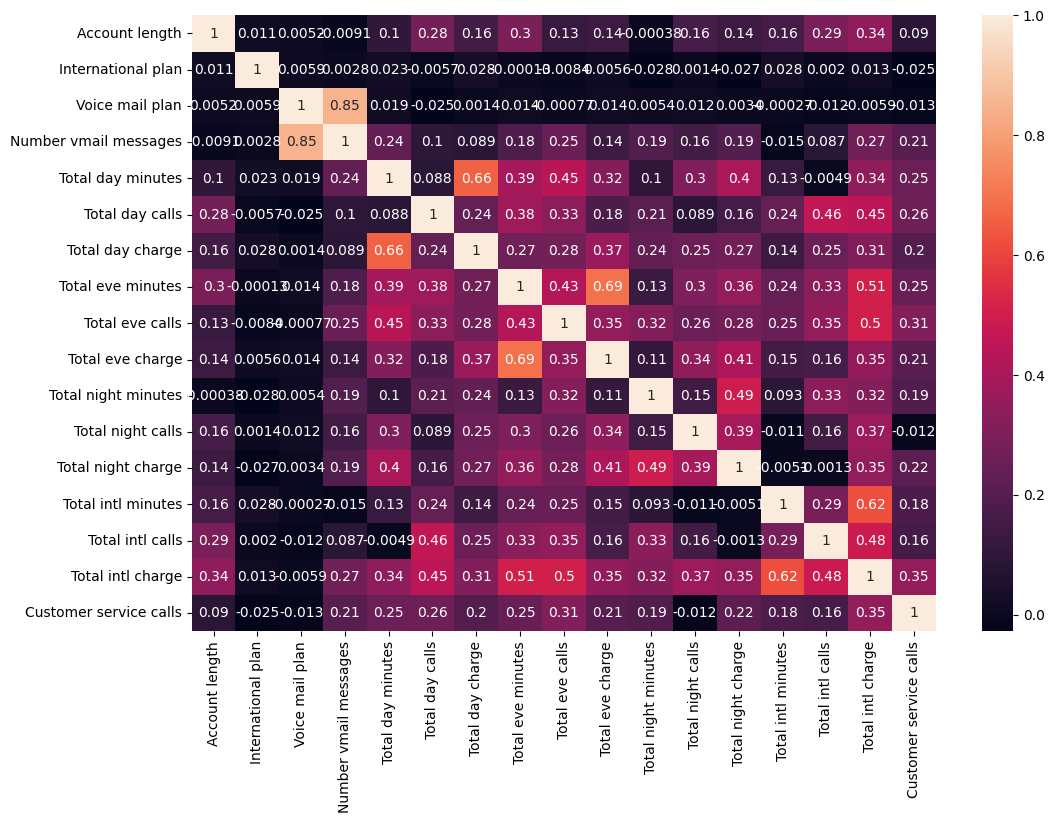

In [3]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True)
plt.show()

0.952


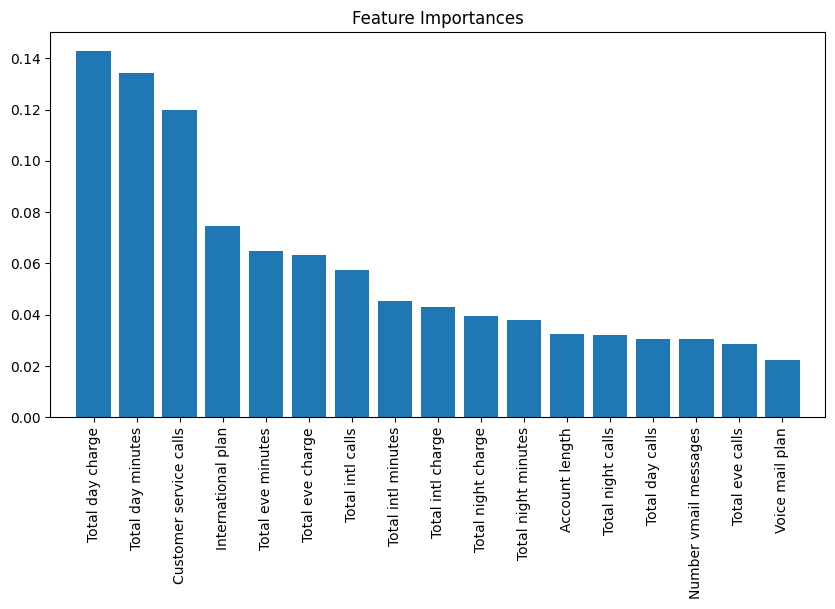

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, y_pred)
print(round(rfc_acc, 3))

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Feature Engineering

## Hypothesis, Learnings and Changes

- Customer service call might be most important predictor (of customer un-happiness)
- High correlation between:
    - Day/eve/night/international minutes
    - Day/eve/night/international calls
    - Day/eve/night/international charge




**Which one to focus on?**

Potential combinations:
* Charge per Call (to check if high price per call drives customers away)
* Minutes per Call (average lenth)
* Charge per minute (should be standardized)


## Process
- Create log of minutes, charge and calls since they are highly skewed
- Calculate additional performance metrics
- Train model
- Drop old columns sequentially and monitor if performance drops or improves (spoiler: it drops)


In [5]:

X['Total minutes'] = X['Total day minutes'] + X['Total eve minutes'] + X['Total night minutes'] + X['Total intl minutes']
X['Total charge'] = X['Total day charge'] + X['Total eve charge'] + X['Total night charge'] + X['Total intl charge']
X['Total calls'] = X['Total day calls'] + X['Total eve calls'] + X['Total night calls'] + X['Total intl calls']

X['Total minutes'] = np.log1p(X['Total minutes'])
X['Total charge'] = np.log1p(X['Total charge'])
X['Total calls'] = np.log1p(X['Total calls'])

# Taken out due to high correlation with charge

# X['Day minutes share'] = X['Total day minutes'] / X['Total minutes']
# X['Eve minutes share'] = X['Total eve minutes'] / X['Total minutes']
# X['Night minutes share'] = X['Total night minutes'] / X['Total minutes']
# X['Intl minutes share'] = X['Total intl minutes'] / X['Total minutes']

X['Day charge share'] = X['Total day charge'] / X['Total charge']
X['Eve charge share'] = X['Total eve charge'] / X['Total charge']
X['Night charge share'] = X['Total night charge'] / X['Total charge']
X['Intl charge share'] = X['Total intl charge'] / X['Total charge']

X['Day calls share'] = X['Total day calls'] / X['Total calls']
X['Eve calls share'] = X['Total eve calls'] / X['Total calls']
X['Night calls share'] = X['Total night calls'] / X['Total calls']
X['Intl calls share'] = X['Total intl calls'] / X['Total calls']


X['Minutes per call'] = X['Total minutes'] / X['Total calls']
X['Charge per minute'] = X['Total charge'] / X['Total minutes']


X['Weighted service calls'] = X['Customer service calls'] * X['Account length']
X['Service call share'] = X['Customer service calls'] / X['Total calls']
X['Weighted service call share'] = (X['Customer service calls'] / X['Total calls']) * X['Account length']



drop_cols = ['Total day charge', 
             'Total eve charge', 
             'Total night charge', 
             'Total intl charge', 
             'Total day minutes', 
             'Total eve minutes', 
             'Total night minutes', 
             'Total intl minutes', 
             'Total day calls', 
             'Total eve calls', 
             'Total night calls', 
             'Total intl calls',
             'Voice mail plan',
             'Voice mail plan',
             'Weighted service calls',
             'Service call share'
]

X.drop(drop_cols, axis=1, inplace=True)

display(X.head())

,Account length,International plan,Number vmail messages,Customer service calls,Total minutes,Total charge,Total calls,Day charge share,Eve charge share,Night charge share,Intl charge share,Day calls share,Eve calls share,Night calls share,Intl calls share,Minutes per call,Charge per minute,Weighted service call share
0,128,0,25,1,6.576748,4.338075,5.717028,10.389401,3.868075,2.537992,0.622396,19.240767,17.316691,15.917362,0.524748,1.150379,0.659608,22.389257
1,107,0,26,1,6.439670,4.098337,5.808142,6.702719,4.055304,2.793816,0.902805,21.177166,17.733725,17.733725,0.516516,1.108731,0.636420,18.422413
2,137,0,0,0,6.292310,4.147727,5.811141,9.976548,2.483288,1.764822,0.793205,19.617490,18.929157,17.896657,0.860416,1.082801,0.659174,0.000000
3,84,1,0,2,6.338241,4.216562,5.545177,12.071445,1.247462,2.101238,0.422145,12.803918,15.869645,16.049982,1.262358,1.143019,0.665258,30.296596
4,75,1,0,3,6.240276,3.971989,5.886104,7.134965,3.174732,2.117327,0.687313,19.197758,20.726783,20.556891,0.509675,1.060171,0.636508,38.225624


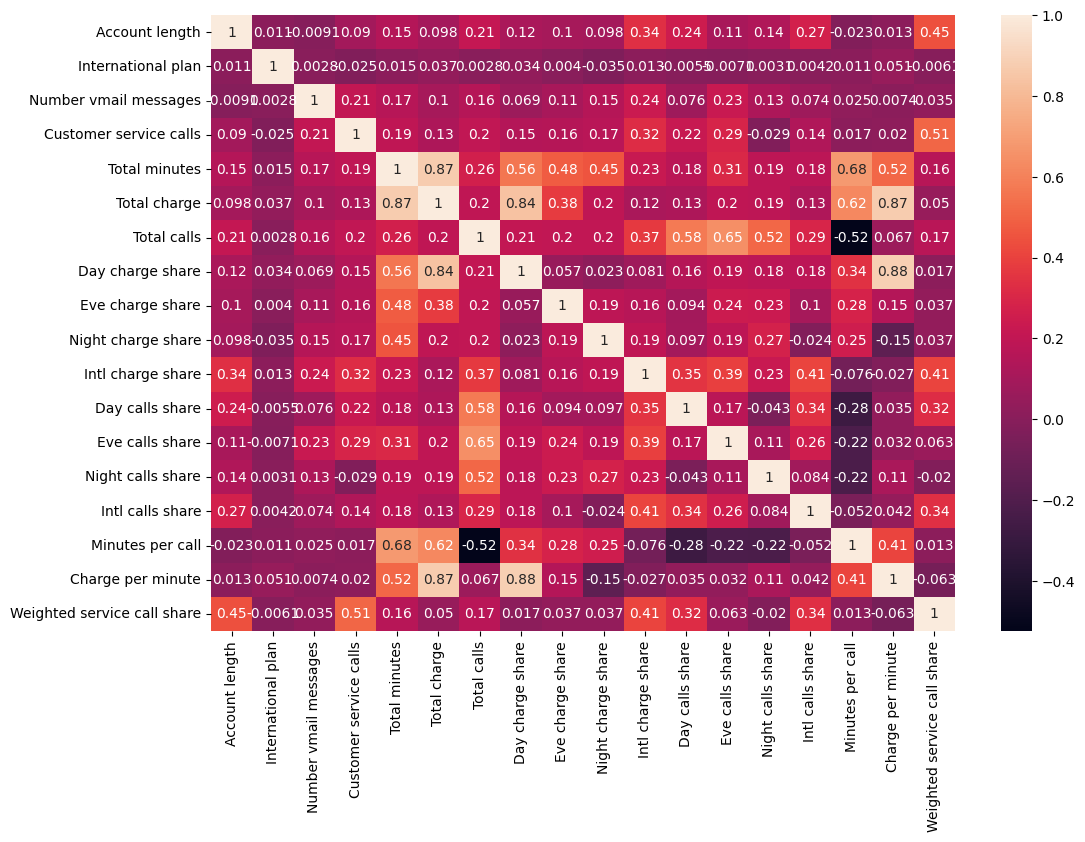

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True)
plt.show()

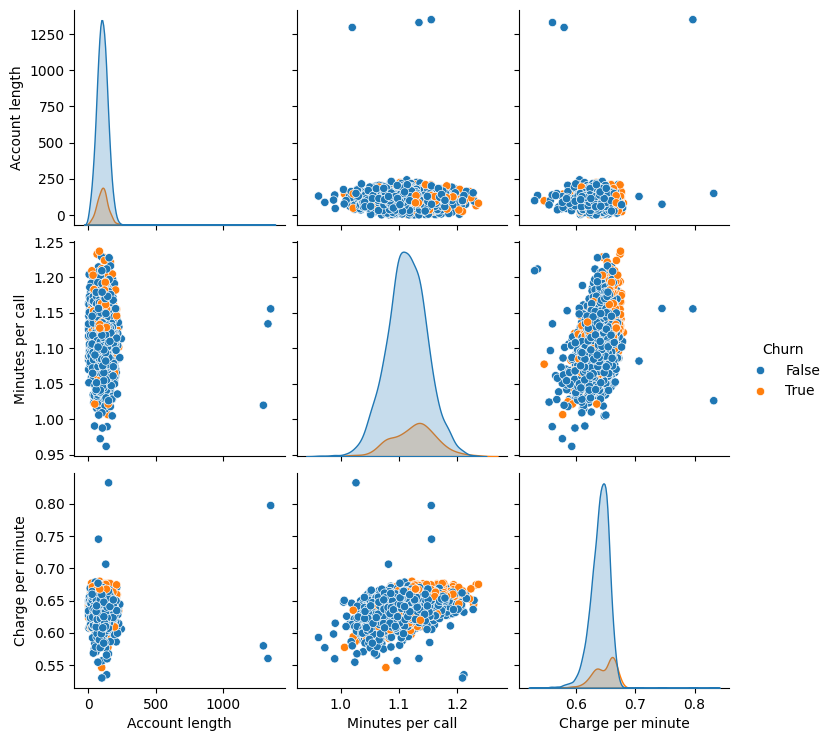

In [7]:
corr_cols = ['Account length', 'Minutes per call', 'Charge per minute']

sns.pairplot(pd.concat([X[corr_cols], y], axis=1), hue='Churn')

## Grid Search

### Defining a custom scoring metric

In [8]:
import numpy as np
from sklearn.metrics import make_scorer

tp_cost = 26 # Potential revenue
fp_cost = 10 # Marketing waste
fn_cost = 0 # Opportunity cost

def profit_score(y_real, y_pred):
    TP = np.sum((y_real == 1) & (y_pred == 1))
    FP = np.sum((y_real == 0) & (y_pred == 1))
    FN = np.sum((y_real == 1) & (y_pred == 0))
    return (TP * tp_cost) - (FP * fp_cost) - (FN * fn_cost)

profit_scorer = make_scorer(profit_score, greater_is_better=True)

### Setting the param grid

In [9]:
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

param_grids = [
    {
        # Logistic Regression
        'classifier': [LogisticRegression(class_weight='balanced', solver='liblinear')],
        'classifier__C': [0.1, 1],
        'classifier__penalty': ['l1', 'l2']
    },
    {
        # Random Forest
        'classifier': [RandomForestClassifier(class_weight='balanced', n_jobs=-1)],
        'classifier__n_estimators': [100],
        'classifier__max_depth': [None, 10],
        'classifier__min_samples_split': [2],
        'classifier__min_samples_leaf': [1, 2]
    },
    {
        # SVC (RBF kernel)
        'classifier': [SVC(probability=True, class_weight='balanced')],
        'classifier__C': [0.1, 1],
        'classifier__kernel': ['rbf'],
        'classifier__gamma': ['scale']
    },
    {
        # XGBoost
        'classifier': [XGBClassifier(use_label_encoder=False, eval_metric='logloss')],
        'classifier__n_estimators': [100],
        'classifier__max_depth': [3, 7],
        'classifier__learning_rate': [0.1],
        'classifier__gamma': [0, 0.1],
        'classifier__scale_pos_weight': [6]
    }
]


### Running the grid search

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grids,
    cv=skf,
    scoring=profit_scorer,
    verbose = 2,
    error_score='raise'
)


# Fit and evaluate
grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END classifier=LogisticRegression(class_weight='balanced', solver='liblinear'), classifier__C=0.1, classifier__penalty=l1; total time=   0.0s
[CV] END classifier=LogisticRegression(class_weight='balanced', solver='liblinear'), classifier__C=0.1, classifier__penalty=l1; total time=   0.1s
[CV] END classifier=LogisticRegression(class_weight='balanced', solver='liblinear'), classifier__C=0.1, classifier__penalty=l1; total time=   0.0s
[CV] END classifier=LogisticRegression(class_weight='balanced', solver='liblinear'), classifier__C=0.1, classifier__penalty=l1; total time=   0.0s
[CV] END classifier=LogisticRegression(class_weight='balanced', solver='liblinear'), classifier__C=0.1, classifier__penalty=l1; total time=   0.0s
[CV] END classifier=LogisticRegression(class_weight='balanced', solver='liblinear'), classifier__C=0.1, classifier__penalty=l2; total time=   0.0s
[CV] END classifier=LogisticRegression(class_weight='bala

/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...), classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__scale_pos_weight=6; total time=   0.1s
[CV] END classifier=XGBClassifier(base_sc

/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...), classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__scale_pos_weight=6; total time=   0.1s
[CV] END classifier=XGBClassifier(base_sc

/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...), classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__scale_pos_weight=6; total time=   0.2s
[CV] END classifier=XGBClassifier(base_sc

/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...), classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__scale_pos_weight=6; total time=   0.1s
[CV] END classifier=XGBClassifier(base_sc

/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...), classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__scale_pos_weight=6; total time=   0.1s
[CV] END classifier=XGBClassifier(base_

/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:04] WARNING: /Users/runn

[CV] END classifier=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...), classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__scale_pos_weight=6; total time=   0.1s
[CV] END classifier=XGBClassifier(base_

/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...), classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__scale_pos_weight=6; total time=   0.1s
[CV] END classifier=XGBClassifier(base_

/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...), classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__scale_pos_weight=6; total time=   0.1s
[CV] END classifier=XGBClassifier(base_

/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lennartdoppstadt/.pyenv/versions/3.12.0/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:16:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [LogisticRegression(class_weight='balanced',
                                                            solver='liblinear')],
                          'classifier__C': [0.1, 1],
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [...
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None, ...)],
                          'classifier__gamma': [0, 0.1],
                          'classifier__learning_rate': [0.1],
                          'classifier__max_depth': [3, 7],
                          'classifier__n_estimators': [100],
                          'classifier__scale_pos_weight': [6]}],
             scoring=make_scorer(profit_score, response_method='predict'),
             verbose=2)

,model,params,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc,test_roc_auc,train_profit,test_profit
0,XGBClassifier,"{'classifier': XGBClassifier(base_score=None, ...",1.0,0.983558,1.0,0.988636,1.0,0.896907,1.0,0.940541,1.0,0.947579,10036,2252


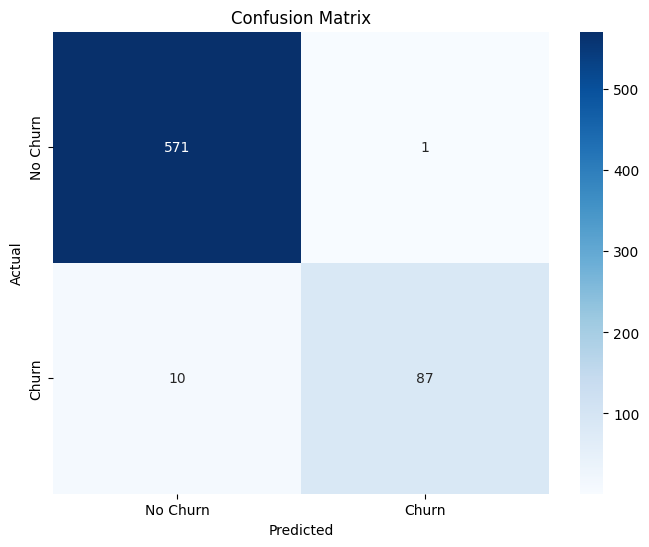

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Best model detals
best_model = grid.best_estimator_
best_model_name = type(best_model.named_steps['classifier']).__name__

train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

scores = {
    'model': best_model_name,
    'params': grid.best_params_,
    'train_accuracy': accuracy_score(y_train, train_preds),
    'test_accuracy': accuracy_score(y_test, test_preds),
    'train_precision': precision_score(y_train, train_preds),
    'test_precision': precision_score(y_test, test_preds),
    'train_recall': recall_score(y_train, train_preds),
    'test_recall': recall_score(y_test, test_preds),
    'train_f1': f1_score(y_train, train_preds),
    'test_f1': f1_score(y_test, test_preds),
    'train_roc_auc': roc_auc_score(y_train, train_preds),
    'test_roc_auc': roc_auc_score(y_test, test_preds),
    'train_profit': profit_score(y_train, train_preds),
    'test_profit': profit_score(y_test, test_preds)
}

final_scores = pd.DataFrame([scores])
display(final_scores)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Profit Calculation

In [12]:
num_customers = 100000
revenue_per_customer = 60
monthly_revenue = num_customers * revenue_per_customer

# Calculate profit

print(conf_matrix)

profit_per_customer = final_scores['test_profit'][0] / len(y_test)
total_profit = profit_per_customer * num_customers
print(f'Profit per customer: ${profit_per_customer:,.2f}')
print(f'Total customers in dataset: {len(X)}')
print(f'Monthly revenue: ${monthly_revenue:,.0f}')
print(f'Total additional revenue after cost: ${total_profit:,.0f}')
print(f'Pct. revenue increase: {total_profit / monthly_revenue:.2%}')

[[571   1]
 [ 10  87]]
Profit per customer: $3.37
Total customers in dataset: 3342
Monthly revenue: $6,000,000
Total additional revenue after cost: $336,622
Pct. revenue increase: 5.61%


In [13]:
import joblib 
model_filename = "churn_prediction_model.pkl"
joblib.dump(best_model, model_filename)

['churn_prediction_model.pkl']

In [14]:
X

,Account length,International plan,Number vmail messages,Customer service calls,Total minutes,Total charge,Total calls,Day charge share,Eve charge share,Night charge share,Intl charge share,Day calls share,Eve calls share,Night calls share,Intl calls share,Minutes per call,Charge per minute,Weighted service call share
0,128,0,25,1,6.576748,4.338075,5.717028,10.389401,3.868075,2.537992,0.622396,19.240767,17.316691,15.917362,0.524748,1.150379,0.659608,22.389257
1,107,0,26,1,6.439670,4.098337,5.808142,6.702719,4.055304,2.793816,0.902805,21.177166,17.733725,17.733725,0.516516,1.108731,0.636420,18.422413
2,137,0,0,0,6.292310,4.147727,5.811141,9.976548,2.483288,1.764822,0.793205,19.617490,18.929157,17.896657,0.860416,1.082801,0.659174,0.000000
3,84,1,0,2,6.338241,4.216562,5.545177,12.071445,1.247462,2.101238,0.422145,12.803918,15.869645,16.049982,1.262358,1.143019,0.665258,30.296596
4,75,1,0,3,6.240276,3.971989,5.886104,7.134965,3.174732,2.117327,0.687313,19.197758,20.726783,20.556891,0.509675,1.060171,0.636508,38.225624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,1330,0,0,30,7.721304,4.326117,6.805723,3.918063,3.955048,2.655961,6.726586,90.365130,14.840452,15.134323,12.195619,1.134531,0.560283,5862.713281
3338,1350,0,0,0,7.941829,6.330612,6.872128,53.312383,20.061252,11.989363,3.175049,13.096380,16.297717,110.009591,0.873092,1.155658,0.797123,0.000000
3339,1296,0,17,0,7.462215,4.327306,7.317212,3.244513,5.742602,2.183807,6.100793,85.688369,89.651627,17.902993,12.436430,1.019817,0.579896,0.000000
3340,149,0,0,27,7.509226,6.249879,7.317212,52.369016,25.696499,1.848036,2.800054,67.785377,108.784597,16.809680,12.299766,1.026241,0.832293,549.799538
